## [ 웹크롤링 _ 나무위키 사이트 분석 및 시각화 ]

### <Step1. 크롤링> : 크롤링으로 웹 데이터 가져오기

[웹크롤링 라이브러리 사용하기]
- 파이썬에서는 BeautifulSoup과 requests라는 라이브러리로 웹 크롤러를 만들 수 있음
- requests는 특정 URL로부터 HTML 문서를 가져오는 작업을 수행
- 나무위키와 같은 페이지는 HTML 문서가 Javascript로 동적 로딩되는 경우가 있음
- requests 대신 셀레니움(selenium) 라이브러리를 이용해 크롬 브라우저로 동적 웹크롤링 수행
- selenium은 웹 브라우저를 자동으로 구동해주는 라이브러리
- selenium을 사용하기 위해 크롬 드라이버를 이용해 크롬 브라우저 자동으로 구동=> 크롬드라이버 필요

### [BeautifulSoup과 selenium을 이용한 웹 크롤링]
- anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치
- (env_name) pip install selenium
- (env_name) pip install beautifulsoup4

### [크롬 브라우저 업데이트 및 크롬 드라이버 설치]
- 크롬 브라우저 설정에서 최신 버전으로 업데이트
- 크롬 드라이버 사이트에서 브라우저 버전에 맞는 드라이버 다운로드
  - https://chromedriver.chromium.org/downloads
- chromedriver.exe 파일을 노트북 파일 경로에 이동

In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### [ BeautifulSoup의 select() VS find_all() ]
- HTML의 특정 요소 선택
- select, select_one 의 경우 CSS 선택자를 이용하는 것처럼 사용 가능
- select의 경우 후손이나 자손 요소를 CSS 처럼 선택 가능
- 예) soup.select("dl > dt > a") 
- find_all, find 의 경우 하나의 태그(name="table")나 하나의 클래스(class="tables")를 선택
- find의 경우 후손이나 자손 요소를 직접 선택할 수 없어 한번 더 변수에 담든지 루프 문을 이용해야 함
- 예) find_all(class="ah_roll"), find(name="table")

In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup
import re # 정규식 표현을 위한 모듈


# 윈도우용 크롬 웹드라이버 실행 경로 (Windows) 지정
excutable_path = "chromedriver.exe"
driver = webdriver.Chrome(executable_path=excutable_path)

# 사이트의 html 구조에 기반하여 크롤링을 수행
source_url = "https://namu.wiki/RecentChanges" # 크롤링할 사이트 주소를 정의
driver.get(source_url)  # 크롬 드라이버를 통해 URL의 HTML 문서 가져옴

# 영진씨 방법
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "app")))

# 명진씨 방법
import time
time.sleep(10)

req = driver.page_source
soup = BeautifulSoup(req, "html.parser") # BeautifulSoup의 soup 객체로 변환

#contents_table = soup.find(name="table")  
#table_body = contents_table.find(name="tbody")
#table_rows = table_body.find_all(name="tr")
table_rows = soup.select("table tbody tr")

In [3]:
req 

'<html><head><link href="/skins/senkawa/6.4cd8c9c215a8ec226109.css" rel="stylesheet"><link href="/skins/senkawa/3.6578e2190d7f10b0f082.css" rel="stylesheet"><script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script><style type="text/css">.resize-observer[data-v-b329ee4c]{position:absolute;top:0;left:0;z-index:-1;width:100%;height:100%;border:none;background-color:transparent;pointer-events:none;display:block;overflow:hidden;opacity:0}.resize-observer[data-v-b329ee4c] object{display:block;position:absolute;top:0;left:0;height:100%;width:100%;overflow:hidden;pointer-events:none;z-index:-1}</style><link rel="stylesheet" type="text/css" href="/skins/senkawa/10.a1e48eb86746983c527d.css"><script charset="utf-8" src="/skins/senkawa/10.a1e48eb86746983c527d.js"></script><title>최근 변경내역 - 나무위키</title><link data-n-head="1" rel="canonical" href="https://namu.wiki/RecentChanges"><link data-n-head="1" rel="search" type="application/opensearchdescription+xml" title="나무위키" href="/opensearch.xml">

In [4]:
soup

<html><head><link href="/skins/senkawa/6.4cd8c9c215a8ec226109.css" rel="stylesheet"/><link href="/skins/senkawa/3.6578e2190d7f10b0f082.css" rel="stylesheet"/><script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script><style type="text/css">.resize-observer[data-v-b329ee4c]{position:absolute;top:0;left:0;z-index:-1;width:100%;height:100%;border:none;background-color:transparent;pointer-events:none;display:block;overflow:hidden;opacity:0}.resize-observer[data-v-b329ee4c] object{display:block;position:absolute;top:0;left:0;height:100%;width:100%;overflow:hidden;pointer-events:none;z-index:-1}</style><link href="/skins/senkawa/10.a1e48eb86746983c527d.css" rel="stylesheet" type="text/css"/><script charset="utf-8" src="/skins/senkawa/10.a1e48eb86746983c527d.js"></script><title>최근 변경내역 - 나무위키</title><link data-n-head="1" href="https://namu.wiki/RecentChanges" rel="canonical"/><link data-n-head="1" href="/opensearch.xml" rel="search" title="나무위키" type="application/opensearchdescription+xm

In [5]:
# contents_table

In [6]:
# table_body

In [7]:
table_rows

[<tr class="" data-v-17dde2e0=""><td data-v-17dde2e0=""><a data-v-17dde2e0="" href="/w/%EB%B9%85%20L">빅 L</a> <a data-v-17dde2e0="" href="/history/%EB%B9%85%20L">[역사]</a> <a data-v-17dde2e0="" href="/diff/%EB%B9%85%20L?rev=160&amp;oldrev=159">[비교]</a> <a data-v-17dde2e0="" href="/discuss/%EB%B9%85%20L">[토론]</a> <span data-v-17dde2e0="">(<span class="KqOjPCWR" data-v-17dde2e0="" data-v-6cbb5b59="">+204</span>)</span></td> <td data-v-17dde2e0=""><div class="v-popover" data-v-17dde2e0="" data-v-1de7cf8c=""><div aria-describedby="popover_rv9x4lrno3" class="trigger" style="display: inline-block;"><a data-v-1de7cf8c="">124.53.162.248</a> </div> </div> <!-- --></td> <td data-v-17dde2e0=""><time data-v-17dde2e0="" datetime="2022-01-27T07:26:43.000Z">2022-01-27 16:26:43</time></td></tr>,
 <tr class="" data-v-17dde2e0=""><td data-v-17dde2e0=""><a data-v-17dde2e0="" href="/w/%EB%AC%B4%EB%A0%A4">무려</a> <a data-v-17dde2e0="" href="/history/%EB%AC%B4%EB%A0%A4">[역사]</a> <a data-v-17dde2e0="" href="/d

In [8]:
len(table_rows)

109

### [페이지 링크주소 리스트 가져오기]

In [9]:
page_url_base = "https://namu.wiki" # 베이스 URL 정의
page_urls = [] # href 속성값을 담기 위한 빈 리스트 생성 

for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all("td")[0]
    td_url = first_td.find_all("a")
    if len(td_url) > 0:
        # 특정 속성 선택시 attrs["속성명"] 또는 get("속성명") 사용
        # page_url = page_url_base + td_url[0].get("href")
        # attrs는 딕셔너리 형태로 속성명과 속성값을 불러옴
        # attrs["href"]는 attrs 결과 중 key가 href인 것의 값만 불러옴
        page_url = page_url_base + td_url[0].attrs["href"] 
        if "png" not in page_url:
            page_urls.append(page_url)
            print(page_urls)

['https://namu.wiki/w/%EB%B9%85%20L']
['https://namu.wiki/w/%EB%B9%85%20L', 'https://namu.wiki/w/%EB%AC%B4%EB%A0%A4']
['https://namu.wiki/w/%EB%B9%85%20L', 'https://namu.wiki/w/%EB%AC%B4%EB%A0%A4', 'https://namu.wiki/w/LICO']
['https://namu.wiki/w/%EB%B9%85%20L', 'https://namu.wiki/w/%EB%AC%B4%EB%A0%A4', 'https://namu.wiki/w/LICO', 'https://namu.wiki/w/%EC%8B%A0%ED%83%9C%EC%9D%BC(%EC%9D%B8%ED%84%B0%EB%84%B7%20%EB%B0%A9%EC%86%A1%EC%9D%B8)/%ED%99%9C%EB%8F%99']
['https://namu.wiki/w/%EB%B9%85%20L', 'https://namu.wiki/w/%EB%AC%B4%EB%A0%A4', 'https://namu.wiki/w/LICO', 'https://namu.wiki/w/%EC%8B%A0%ED%83%9C%EC%9D%BC(%EC%9D%B8%ED%84%B0%EB%84%B7%20%EB%B0%A9%EC%86%A1%EC%9D%B8)/%ED%99%9C%EB%8F%99', 'https://namu.wiki/w/Big%20East']
['https://namu.wiki/w/%EB%B9%85%20L', 'https://namu.wiki/w/%EB%AC%B4%EB%A0%A4', 'https://namu.wiki/w/LICO', 'https://namu.wiki/w/%EC%8B%A0%ED%83%9C%EC%9D%BC(%EC%9D%B8%ED%84%B0%EB%84%B7%20%EB%B0%A9%EC%86%A1%EC%9D%B8)/%ED%99%9C%EB%8F%99', 'https://namu.wiki/w/Big%20Ea

In [10]:
td_url[0].attrs

{'data-v-17dde2e0': '',
 'href': '/w/%EB%82%B4%EC%85%94%EB%84%90%EB%A6%AC%EC%A6%98'}

In [11]:
page_urls

['https://namu.wiki/w/%EB%B9%85%20L',
 'https://namu.wiki/w/%EB%AC%B4%EB%A0%A4',
 'https://namu.wiki/w/LICO',
 'https://namu.wiki/w/%EC%8B%A0%ED%83%9C%EC%9D%BC(%EC%9D%B8%ED%84%B0%EB%84%B7%20%EB%B0%A9%EC%86%A1%EC%9D%B8)/%ED%99%9C%EB%8F%99',
 'https://namu.wiki/w/Big%20East',
 'https://namu.wiki/w/%EC%BD%94%EB%93%9C%20%EB%B2%A0%EC%9D%B8/%EB%93%B1%EC%9E%A5%EC%9D%B8%EB%AC%BC',
 'https://namu.wiki/w/%EB%8D%B0%EB%AA%AC%EC%8A%AC%EB%A0%88%EC%9D%B4%EC%96%B4(%EB%A9%94%EC%9D%B4%ED%94%8C%EC%8A%A4%ED%86%A0%EB%A6%AC)',
 'https://namu.wiki/w/%EB%B2%A8%EC%A0%9C%EB%B6%91(%EC%8B%A0%EC%A2%8C%EB%A7%8C%EC%83%81%20%EC%8B%9C%EB%A6%AC%EC%A6%88)',
 'https://namu.wiki/w/%EB%85%B8%EB%9D%BC%EC%BF%A0%EB%A1%9C%EA%B5%B0',
 'https://namu.wiki/w/%ED%81%AC%EB%A3%A8%EC%95%84%EC%83%81%EB%A7%9B%20%EC%BF%A0%ED%82%A4',
 'https://namu.wiki/w/%EB%AA%A8%ED%97%98%EA%B0%80(%EB%A9%94%EC%9D%B4%ED%94%8C%EC%8A%A4%ED%86%A0%EB%A6%AC)/%EC%8A%A4%ED%86%A0%EB%A6%AC%20%EB%B0%8F%20%ED%80%98%EC%8A%A4%ED%8A%B8',
 'https://namu.wiki/w/%ED%9B%8

### [각 링크 페이지내 텍스트 구조를 확인하여 제목, 카테고리, 내용 출력]

In [12]:
# 윈도우용 크롬 웹드라이버 실행 경로 (Windows) 지정
excutable_path = "chromedriver.exe"
driver = webdriver.Chrome(executable_path=excutable_path)
# 크롬 드라이버를 통해 page_urls[0]번째 사이트의 HTML 문서 가져옴
driver.get(page_urls[0])  # page_urls[0] 의 정보를 가져옴
req = driver.page_source # 페이지 소스를 req에 저장
soup = BeautifulSoup(req, 'html.parser') # html.parser로 파싱
contents_table = soup.find(name="article") #  불러온 소스에서 태그명이 article인 요소 하나만 추출

### 타이틀 추출
title = contents_table.find_all('h1')[0] # 태그명이 h1인 모든 태그 추출, article h1

### 카테고리 추출
category = contents_table.find_all('ul')[0]

### 내용 추출
#contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})  
#div  태그 중  class 속성값이  wiki-paragraph인 요소를 추출
content_paragraphs = contents_table.select("div.wiki-paragraph")  

#  내용으로 추출한 리스트를 하나의 문자열로 전처리
content_corpus_list = [] # 내용 중 텍스트만 담을 빈 리스트 생성
# content_paragraphs 리스트의 값을 순서대로 paragraphs에 대입
for paragraphs in content_paragraphs: # content_paragraphs 리스트의 값을 순서대로 paragraphs에 대입
    content_corpus_list.append(paragraphs.text)  # 가져온 결과 태그 중 텍스트만 추출하여 content_corpus_list에 추가
content_corpus =" ".join(content_corpus_list) #"텍스트".join(리스트명) => 리스트의 요소를 "텍스트"로 구분하여 하나의 문자열로 만듦

print(title.text) # 제목 출력
print("\n")
print(category.text) # 카테고리 출력
print("\n")
print(content_corpus) # 내용 출력

# 크롤링에 사용한 브라우저를 종료합니다.
driver.close()

Exception ignored in: <function Service.__del__ at 0x000001BF97F8FDC0>
Traceback (most recent call last):
  File "C:\Users\YJ\anaconda3\lib\site-packages\selenium\webdriver\common\service.py", line 172, in __del__
    self.stop()
  File "C:\Users\YJ\anaconda3\lib\site-packages\selenium\webdriver\common\service.py", line 147, in stop
    self.send_remote_shutdown_command()
  File "C:\Users\YJ\anaconda3\lib\site-packages\selenium\webdriver\common\service.py", line 128, in send_remote_shutdown_command
    if not self.is_connectable():
  File "C:\Users\YJ\anaconda3\lib\site-packages\selenium\webdriver\common\service.py", line 116, in is_connectable
    return utils.is_connectable(self.port)
  File "C:\Users\YJ\anaconda3\lib\site-packages\selenium\webdriver\common\utils.py", line 107, in is_connectable
    socket_ = socket.create_connection((host, port), 1)
  File "C:\Users\YJ\anaconda3\lib\socket.py", line 832, in create_connection
    sock.connect(sa)
KeyboardInterrupt: 


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=97.0.4692.99)
Stacktrace:
Backtrace:
	Ordinal0 [0x00B1FDC3+2555331]
	Ordinal0 [0x00AB77F1+2127857]
	Ordinal0 [0x009B2E08+1060360]
	Ordinal0 [0x0099C270+967280]
	Ordinal0 [0x009FA119+1351961]
	Ordinal0 [0x00A06D82+1404290]
	Ordinal0 [0x009F7976+1341814]
	Ordinal0 [0x009D36B6+1193654]
	Ordinal0 [0x009D4546+1197382]
	GetHandleVerifier [0x00CB9622+1619522]
	GetHandleVerifier [0x00D6882C+2336844]
	GetHandleVerifier [0x00BB23E1+541697]
	GetHandleVerifier [0x00BB1443+537699]
	Ordinal0 [0x00ABD18E+2150798]
	Ordinal0 [0x00AC1518+2168088]
	Ordinal0 [0x00AC1660+2168416]
	Ordinal0 [0x00ACB330+2208560]
	BaseThreadInitThunk [0x7548FA29+25]
	RtlGetAppContainerNamedObjectPath [0x77397A9E+286]
	RtlGetAppContainerNamedObjectPath [0x77397A6E+238]


### [각각 링크 페이지를 크롤링하여 제목, 카테고리, 내용 출력]

In [ ]:
# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비
columns = ["title", "category", "content_text"]
df = pd.DataFrame(columns=columns)

#for page_url in page_urls:
for i in range(10):
    # 윈도우용 크롬 웹드라이버 실행 경로 (Windows) 지정
    excutable_path = "chromedriver.exe"
    driver = webdriver.Chrome(executable_path=excutable_path)
    # 크롬 드라이버를 통해 page_urls[0]번째 사이트의 HTML 문서 가져옴
    #driver.get(page_url)  # page_urls[i],  page_url의 정보를 가져옴
    driver.get(page_urls[i])  # page_urls[i],  page_url의 정보를 가져옴
    req = driver.page_source # 페이지 소스를 req에 저장
    soup = BeautifulSoup(req, 'html.parser') # html.parser로 파싱
    contents_table = soup.find(name="article") #  불러온 소스에서 태그명이 article인 요소 하나만 추출

    ### 타이틀 추출
    title = contents_table.find_all('h1')[0] # 태그명이 h1인 모든 태그 추출, article h1
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
        
    ### 카테고리 추출
    # 카테고리 정보가 없는 경우를 확인합니다.
    if len(contents_table.find_all("ul")) > 0: # article ul 로 검색한 결과 여러 ul 결과가 나올 경우
        category = contents_table.find_all("ul")[0] # 제일 첫번째 article ul 을 category로 설정
    else:
        category = None
        
    if category is not None:
        row_category = category.text.replace("\n", " ")
    else:
        row_category = ""

    ### 내용 추출
    #contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})  
    #div  태그 중  class 속성값이  wiki-paragraph인 요소를 추출
    content_paragraphs = contents_table.select("div.wiki-paragraph")  
    #  내용으로 추출한 리스트를 하나의 문자열로 전처리
    content_corpus_list = [] # 내용 중 텍스트만 담을 빈 리스트 생성
    
    # content_paragraphs 리스트의 값을 순서대로 paragraphs에 대입
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")

    # 모든 정보를 하나의 데이터 프레임에 저장하기 위해서 시리즈 생성
    # 각 페이지의 정보를 추출하여 제목, 카테고리, 내용 순으로 행을 생성
    row = [row_title, row_category, "".join(content_corpus_list)]
    # 시리즈로 만듦
    series = pd.Series(row, index=df.columns)
    # 데이터 프레임에 시리즈를 추가, 한 페이지 당 하나의 행 추가
    df = df.append(series, ignore_index=True)
    
    # 크롤링에 사용한 브라우저를 종료합니다.
    driver.close()

In [ ]:
# 데이터 프레임을 출력합니다.
df

## [명사만을 추출하여 워드 클라우드 그리기]

### [코엔엘파이(konlpy)를 이용한 형태소 분석]

- 품사란 단어를 기능, 형태, 의미에 따라 나눈 갈래
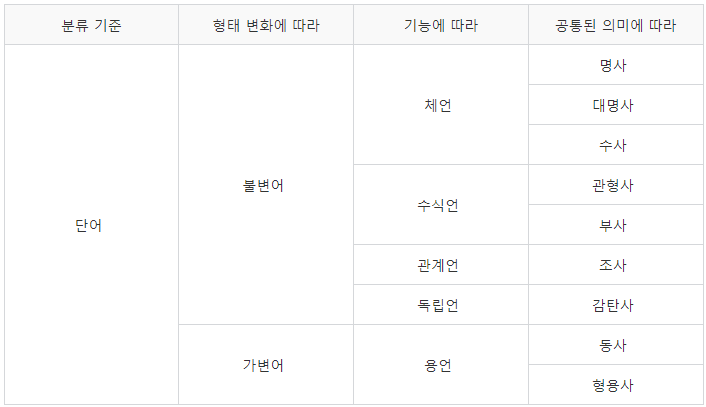

#### [형태소 분석과 품사태깅]
- 형태소 : 더 이상 분리를 할 수 없는 의미를 갖는 최소 단어를 의미
- 형태소 분석 : 형태소를 비롯하여, 어근,접두사/접미사, 품사(POS,part-of-search)등 다양한 언어적 속성의 구조를 파악하는 것
- - 품사태깅 : 형태소와 품사를 매칭시키는 것

#### [빈도 분석 : 문장 형태소 분석 - KoNLPy]
 - KoNLPy : 파이썬 한국어 형태소 분석 라이브러리

# <Step2. 추출> : 키워드 추출
### [텍스트 데이터 전처리] 정규식을 사용하여 한글과 띄어쓰기만 가져오기
#### 파이썬 정규표현식(re) 사용법
- 정규표현식 : 컴파일 => re.compile, 컴파일을 미리 해 두고 이를 저장
- 정규표현식 : 치환 => re.subn(pattern,repl,string,count,flags)

#한글 코드 범위

#ㄱ\~ㅎ : 0x3131~0x314e

#ㅏ\~ㅣ : 0x314f~0x3163

#가\~힣 : 0xac00~0xd7a3

In [ ]:
import re

#사용자 정의 함수 선언
def text_cleaning(text):
    hangul=re.compile('[^ ㄱ-ㅣ가-힣]+')#[^ㄱ-|가-힣+] 한글과 띄어쓰기의 정규식 패턴 ^ => [안에 범위] 포함 없을경우 제거
    result=hangul.sub('',text) #한글과 띄어쓰기를 제외한 모든 글자 패턴을 ''빈 문자로 치환
    return result

print(text_cleaning('반갑습니다'))

In [ ]:
print(text_cleaning(df['title'][0]))

In [ ]:
print(text_cleaning(df['category'][0]))

In [ ]:
print(text_cleaning(df['content_text'][0]))

In [ ]:
#각 피처마다 데이터 전처리 적용 한글과 띄어쓰기를 제외한 모든 부분을 제거
df['title']=df['title'].apply(lambda x : text_cleaning(x))
df['category']=df['category'].apply(lambda x : text_cleaning(x))
df['content_text']=df['content_text'].apply(lambda x : text_cleaning(x))
df.head()

In [ ]:
#각 피처마다 말뭉치를 생성
title_corpus="".join(df['title'].tolist())
category_corpus="".join(df['category'].tolist())
content_corpus="".join(df['content_text'].tolist())
print(title_corpus)
print(category_corpus)
print(content_corpus)

In [ ]:
from konlpy.tag import Okt
from collections import Counter
#konlpy의 형태소 분석기로 명사 단위의 키워드를 추출합니다.
nouns_tagger=Okt()
nouns=nouns_tagger.nouns(content_corpus)
count=Counter(nouns)
count

In [ ]:
#한 글자 키워드를 제거합니다.
#count 딕셔너리를 돌면서 길이가 1보다 큰것만 remove_char_counter에 저장.
remove_char_counter = Counter({x : count[x] for x in count if len(x)>1})
print(remove_char_counter)

In [ ]:
#한국어 약식 불용어 사전 예시 파일
korean_stopwords_path = 'stopwords.txt'

#텍스트 파일 오픈
with open(korean_stopwords_path,encoding='utf8') as f:
    stopwords = f.readlines()
stopwords=[x.strip() for x in stopwords]
print(stopwords[:10])

#불용어 추가
namu_wiki_stopwords=['상위','문서','내용','누설','아래','해당','설명','표기','추가','모든',
                     '사용','매우','가장','줄거리','요소','상황', '편집', '틀', '경우', 
                     '때문', '모습', '정도', '이후', '사실', '생각', '인물', '이름','년월']
for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)
    
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})
remove_char_counter = Counter({x : count[x] for x in count if len(x)>1})
print(remove_char_counter)

In [ ]:
import random
import pytagcloud
import webbrowser
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

In [ ]:
#가장 출현 빈도수가 높은 40개의 단어 선정
ranked_tags=remove_char_counter.most_common(40)

#pytagcloud로 출력할 40개의 단어 입력 최대크기는 80으로 제한
taglist=pytagcloud.make_tags(ranked_tags,maxsize=80)

#pytagcloud 이미지를 생성합니다.
pytagcloud.create_tag_image(taglist,'cloud_img.jpg',size=(900,600),fontname='NanumGothic',rectangular=False)

from IPython.display import Image
Image(filename='cloud_img.jpg')

In [ ]:
from PIL import Image
img=Image.open('./crap_img.png')
img_array=np.array(img)

wc=WordCloud(font_path='malgun',width=800,height=700,scale=4.0,max_font_size=250,mask=img_array,background_color='white',
             contour_width=3,contour_color='red')
gen=wc.generate_from_frequencies(remove_char_counter)

plt.figure(figsize=(20, 10))
plt.imshow(gen)
plt.axis('off')
plt.savefig('word_crap_img.jpg')

In [ ]:
from PIL import Image
img=Image.open('./dolphin_img.png')
img_array=np.array(img)

wc=WordCloud(font_path='malgun',width=800,height=700,scale=4.0,max_font_size=250,mask=img_array,background_color='white',
             contour_width=3,contour_color='steelblue')
gen=wc.generate_from_frequencies(remove_char_counter)

plt.figure(figsize=(20, 10))
plt.imshow(gen)
plt.axis('off')
plt.savefig('word_dolphin_img.jpg')

In [ ]:
from PIL import Image
alice_coloring=np.array(Image.open("alice_img.png"))
wc=WordCloud(font_path='malgun',background_color='white',max_words=2000,
             mask=alice_coloring, max_font_size=40,random_state=42,contour_color='black',contour_width=1)
gen=wc.generate_from_frequencies(remove_char_counter)
from wordcloud import ImageColorGenerator
imge_colors=ImageColorGenerator(alice_coloring)
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=imge_colors),interpolation='bilinear')
plt.axis('off')
plt.show()